# **Importing Modules and Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# **Importing Datasets**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/UNSW_NB15.csv')

In [ ]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
data.nunique()

id                   175341
dur                   74039
proto                   133
service                  13
state                     9
spkts                   480
dpkts                   443
sbytes                 7214
dbytes                 6660
rate                  76991
sttl                     11
dttl                      6
sload                 80885
dload                 77474
sloss                   409
dloss                   370
sinpkt                76161
dinpkt                74245
sjit                  77532
djit                  76831
swin                     13
stcpb                 75265
dtcpb                 75089
dwin                      7
tcprtt                43319
synack                40142
ackdat                37708
smean                  1357
dmean                  1328
trans_depth              11
response_body_len      2386
ct_srv_src               52
ct_state_ttl              5
ct_dst_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm    

In [ ]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
data.attack_cat.value_counts()


Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum().sum().any()


False

In [ ]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)

In [ ]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [ ]:
data.shape

(175341, 45)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(81173, 45)

In [ ]:
data['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [ ]:
data['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

## **Binary Classification**

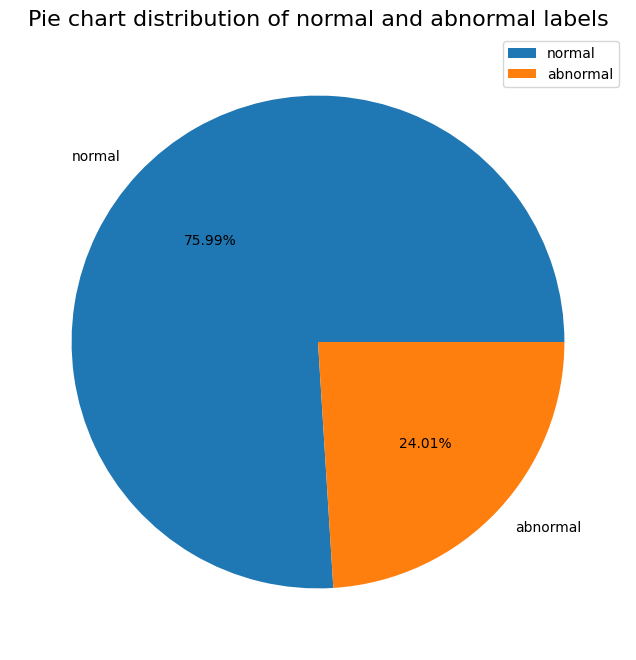

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

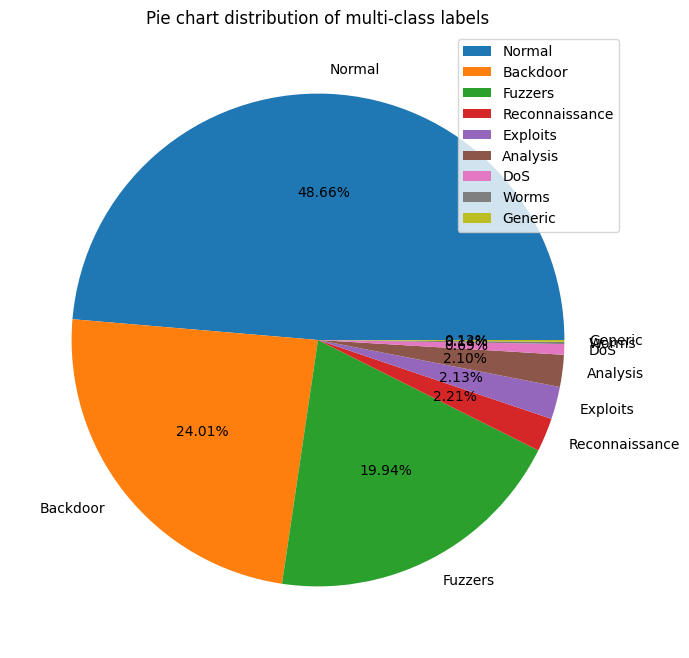

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/Pie_chart_multi.png')
plt.show()

# **One hot encoding**

In [ ]:
num_col = data.select_dtypes(include='number').columns

cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.shape

(81173, 45)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

# d=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_64.csv')
# d.shape()

In [ ]:
data.shape

(81173, 64)

In [ ]:
data.drop(columns=cat_col,inplace=True)
data.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_64.csv')
d=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_64.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81173 entries, 0 to 81172
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         81173 non-null  int64  
 1   id                 81173 non-null  int64  
 2   dur                81173 non-null  float64
 3   spkts              81173 non-null  int64  
 4   dpkts              81173 non-null  int64  
 5   sbytes             81173 non-null  int64  
 6   dbytes             81173 non-null  int64  
 7   rate               81173 non-null  float64
 8   sttl               81173 non-null  int64  
 9   dttl               81173 non-null  int64  
 10  sload              81173 non-null  float64
 11  dload              81173 non-null  float64
 12  sloss              81173 non-null  int64  
 13  dloss              81173 non-null  int64  
 14  sinpkt             81173 non-null  float64
 15  dinpkt             81173 non-null  float64
 16  sjit               811

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   spkts              81173 non-null  int64  
 3   dpkts              81173 non-null  int64  
 4   sbytes             81173 non-null  int64  
 5   dbytes             81173 non-null  int64  
 6   rate               81173 non-null  float64
 7   sttl               81173 non-null  int64  
 8   dttl               81173 non-null  int64  
 9   sload              81173 non-null  float64
 10  dload              81173 non-null  float64
 11  sloss              81173 non-null  int64  
 12  dloss              81173 non-null  int64  
 13  sinpkt             81173 non-null  float64
 14  dinpkt             81173 non-null  float64
 15  sjit               81173 non-null  float64
 16  djit               81

# **Data Normalization**


In [ ]:
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

## **Binary Labels**

In [ ]:
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
bin_data1 = data.copy()
bin_data1['label'] = bin_label

In [ ]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data1['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [ ]:
num_col.append('label')

## **Correlation Matrix for Binary Labels**

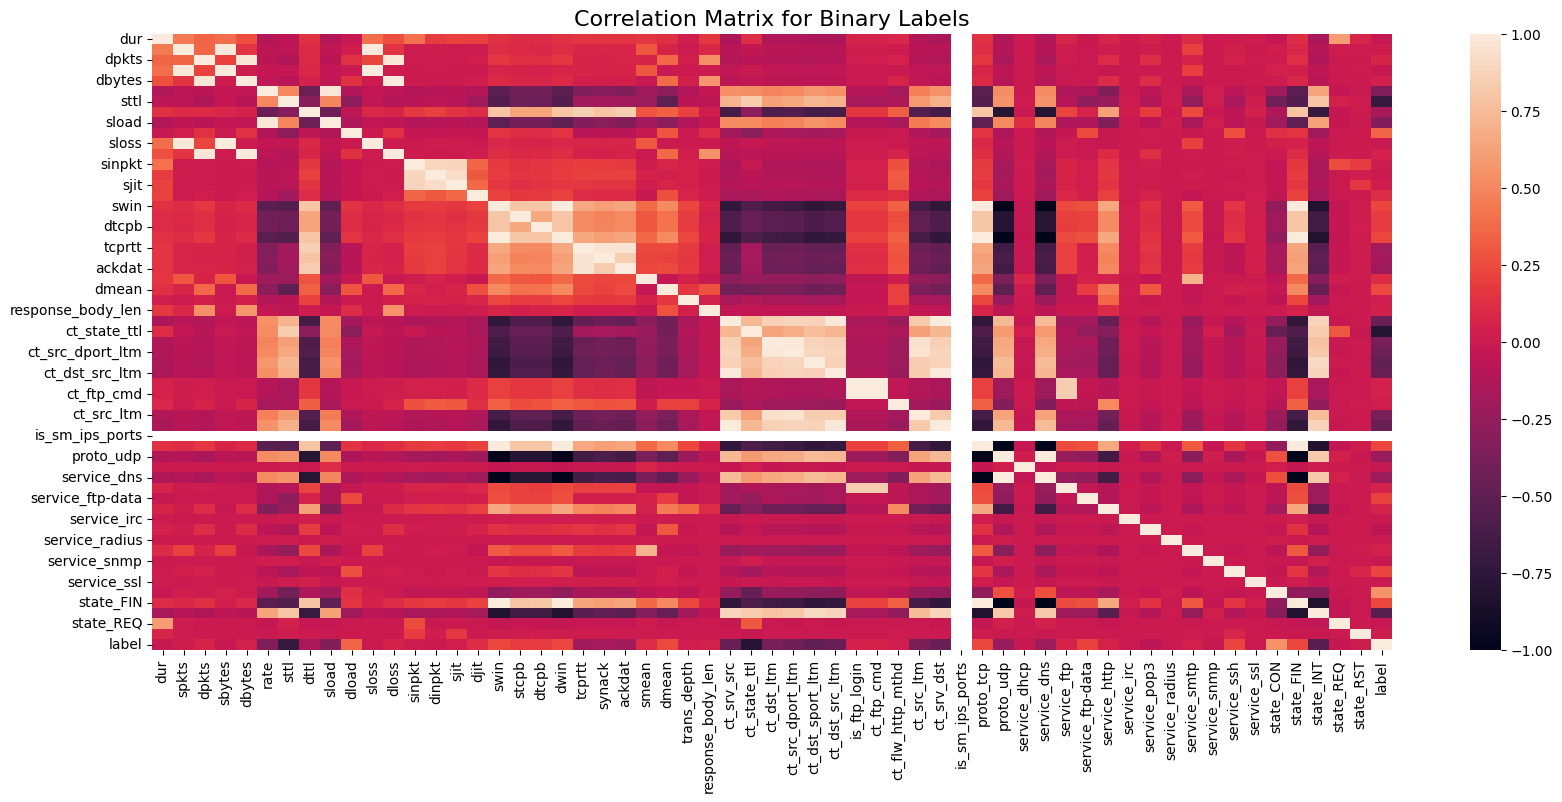

In [ ]:
plt.figure(figsize=(20,8))
corr_bin = bin_data1[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/correlation_matrix_bin.png')
plt.show()

# **Feature Selection**

In [ ]:
print(bin_data1)

            id           dur     spkts     dpkts    sbytes    dbytes  \
3            4  2.802780e-02  0.001144  0.001093  0.000041  0.000053   
11          12  3.488529e-02  0.006344  0.002551  0.004337  0.000151   
15          16  1.666693e-08  0.000104  0.000000  0.000003  0.000000   
17          18  6.559354e-03  0.000936  0.000729  0.000059  0.000075   
21          22  5.633690e-03  0.000936  0.000547  0.000069  0.000018   
...        ...           ...       ...       ...       ...       ...   
175335  175336  8.333466e-08  0.000104  0.000000  0.000001  0.000000   
175336  175337  1.333355e-07  0.000104  0.000000  0.000001  0.000000   
175338  175339  1.333355e-07  0.000104  0.000000  0.000001  0.000000   
175339  175340  1.333355e-07  0.000104  0.000000  0.000001  0.000000   
175340  175341  1.333355e-07  0.000104  0.000000  0.000001  0.000000   

            rate      sttl      dttl     sload  ...  service_radius  \
3       0.000014  0.138393  0.992126  0.000001  ...             

In [ ]:
print(bin_label)

           label
3         normal
11        normal
15        normal
17        normal
21        normal
...          ...
175335  abnormal
175336  abnormal
175338  abnormal
175339  abnormal
175340  abnormal

[81173 rows x 1 columns]


## **Binary Labels**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_64.csv')

In [ ]:
data.head()

,Unnamed: 0,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,3,4,1.681642,12,12,628,770,13.677108,62,252,...,0,0,0,0,0,0,1,0,0,0
1,11,12,2.093085,62,28,56329,2212,42.520967,62,252,...,0,1,0,0,0,0,1,0,0,0
2,15,16,0.000002,2,0,138,0,500000.001300,254,0,...,0,0,1,0,0,0,0,1,0,0
3,17,18,0.393556,10,8,860,1096,43.195886,62,252,...,0,0,0,0,0,0,1,0,0,0
4,21,22,0.338017,10,6,998,268,44.376468,254,252,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def fitness_function(selected_features, X_train, X_test, y_train, y_test):

    selected_X_train = X_train[:, np.nonzero(selected_features)[0]]
    selected_X_test = X_test[:, np.nonzero(selected_features)[0]]

    if len(selected_X_train) == 0:
        return 0.0

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(selected_X_train, y_train)

    predictions = knn.predict(selected_X_test)

    accuracy = np.mean(predictions == y_test)
    return accuracy

def initialize_cuckoos(num_cuckoos, num_features):
    cuckoo_population=np.random.randint(2, size=(num_cuckoos, num_features))

    if np.sum(cuckoo_population) == 0:
      for i in range(num_cuckoos):
          random_feature = np.random.randint(num_features)
          cuckoo_population[i, random_feature] = 1

    return cuckoo_population


def levy_flight_step(num_features):
    step_size = np.random.randn(num_features)
    step_size /= np.linalg.norm(step_size)
    levy = 0.01 * step_size * np.random.randn(num_features)
    return levy

def cuckoo_search_feature_selection(X_train, X_test, y_train, y_test, num_cuckoos, max_generations, pa=0.25):
    num_features = X_train.shape[1]
    cuckoo_population = initialize_cuckoos(num_cuckoos, num_features)
    cuckoo_fitness = [fitness_function(cuckoo, X_train, X_test, y_train, y_test) for cuckoo in cuckoo_population]

    best_solution_index = np.argmax(cuckoo_fitness)
    best_solution = cuckoo_population[best_solution_index]
    best_fitness = cuckoo_fitness[best_solution_index]

    for generation in range(max_generations):
        print(cuckoo_population)
        new_cuckoos = np.copy(cuckoo_population)

        for i in range(num_cuckoos):
            levy = levy_flight_step(num_features)

            cuckoo = cuckoo_population[i]
            new_cuckoos[i] = cuckoo + np.multiply(levy, np.random.randint(2, size=num_features))

            new_fitness = fitness_function(new_cuckoos[i], X_train, X_test, y_train, y_test)

            if new_fitness > cuckoo_fitness[i]:
                cuckoo_population[i] = new_cuckoos[i]
                cuckoo_fitness[i] = new_fitness

            if np.random.rand() < pa:
                random_cuckoo_index = np.random.randint(num_cuckoos)
                cuckoo_population[random_cuckoo_index] = initialize_cuckoos(1, num_features)[0]
                cuckoo_fitness[random_cuckoo_index] = fitness_function(cuckoo_population[random_cuckoo_index], X_train, X_test, y_train, y_test)

            if cuckoo_fitness[i] > best_fitness:
                best_solution = cuckoo_population[i]
                best_fitness = cuckoo_fitness[i]

    return best_solution

if __name__ == "__main__":
    data = pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/UNSW_NB15.csv')
    data = data.drop(columns=['id', 'proto', 'service', 'state', 'attack_cat'])

    column_names_array = data.columns.values
    new_column_names_array = column_names_array[1:]

    X = data[new_column_names_array].values
    y = data['label'].values

    data.info()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    num_cuckoos = 10
    max_generations = 50

    selected_features = cuckoo_search_feature_selection(X_train, X_test, y_train, y_test, num_cuckoos, max_generations)

    print("Selected features:", selected_features)
    print("Selected feature indices:", np.nonzero(selected_features)[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   spkts              175341 non-null  int64  
 2   dpkts              175341 non-null  int64  
 3   sbytes             175341 non-null  int64  
 4   dbytes             175341 non-null  int64  
 5   rate               175341 non-null  float64
 6   sttl               175341 non-null  int64  
 7   dttl               175341 non-null  int64  
 8   sload              175341 non-null  float64
 9   dload              175341 non-null  float64
 10  sloss              175341 non-null  int64  
 11  dloss              175341 non-null  int64  
 12  sinpkt             175341 non-null  float64
 13  dinpkt             175341 non-null  float64
 14  sjit               175341 non-null  float64
 15  djit               175341 non-null  float64
 16  sw

In [5]:
data_df=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/UNSW_NB15.csv')
data_df=data_df[['dur', 'dpkts', 'sbytes', 'dload', 'sloss', 'dloss', 'dinpkt', 'swin', 'synack', 'ct_state_ttl', 'is_ftp_login', 'is_sm_ips_ports','label']]
# data_df.head()
# data_df=data_df[['sttl','dttl','sinkpkt','stcpb','synack','ct_state_ttl','ct_dst_sport_ltm','is_ftp_login','label']]
data_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_gwo_cuckoo_50_final.csv')

d=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_gwo_cuckoo_50_final.csv')
d.head()

,Unnamed: 0,dur,dpkts,sbytes,dload,sloss,dloss,dinpkt,swin,synack,ct_state_ttl,is_ftp_login,is_sm_ips_ports,label
0,0,0.121478,4,258,8495.365234,0,0,8.375000,255,0.000000,0,0,0,0
1,1,0.649902,38,734,503571.312500,2,17,15.432865,255,0.000000,1,0,0,0
2,2,1.623129,16,364,60929.230470,1,6,102.737203,255,0.061458,1,0,0,0
3,3,1.681642,12,628,3358.622070,1,3,90.235726,255,0.000000,1,1,0,0
4,4,0.449454,6,534,3987.059814,2,1,75.659602,255,0.071147,1,0,0,0


# **BINARY CLASSIFICATION**

## **Data Splitting**



In [6]:
bin_data=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_gwo_cuckoo_50_final.csv')
bin_data

,Unnamed: 0,dur,dpkts,sbytes,dload,sloss,dloss,dinpkt,swin,synack,ct_state_ttl,is_ftp_login,is_sm_ips_ports,label
0,0,0.121478,4,258,8495.365234,0,0,8.375000,255,0.000000,0,0,0,0
1,1,0.649902,38,734,503571.312500,2,17,15.432865,255,0.000000,1,0,0,0
2,2,1.623129,16,364,60929.230470,1,6,102.737203,255,0.061458,1,0,0,0
3,3,1.681642,12,628,3358.622070,1,3,90.235726,255,0.000000,1,1,0,0
4,4,0.449454,6,534,3987.059814,2,1,75.659602,255,0.071147,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175336,0.000009,0,114,0.000000,0,0,0.000000,0,0.000000,2,0,0,1
175337,175337,0.505762,8,620,4903.492188,2,1,66.980570,255,0.036895,1,0,0,1
175338,175338,0.000009,0,114,0.000000,0,0,0.000000,0,0.000000,2,0,0,1
175339,175339,0.000009,0,114,0.000000,0,0,0.000000,0,0.000000,2,0,0,1


In [7]:
X = bin_data.drop(columns=['label', 'Unnamed: 0'],axis=1)
Y = bin_data['label']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## **Linear Regression**

In [9]:
lr_bin = LinearRegression()
lr_bin.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr_bin.predict(X_test)

In [11]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [12]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.11511591434030055
Mean Squared Error -  0.11511591434030055
Root Mean Squared Error -  0.3392873624824546
R2 Score -  47.27579640813363
Accuracy -  88.48840856596995


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [ ]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.87      0.87      0.87     11068
      normal       0.94      0.94      0.94     24001

    accuracy                           0.92     35069
   macro avg       0.90      0.90      0.90     35069
weighted avg       0.92      0.92      0.92     35069



### **Real and Predicted Data**

In [ ]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/lr_real_pred_bin.csv')
lr_bin_df

,Actual,Predicted
85117,0,1
82473,0,1
84417,1,0
7760,0,0
1517,0,0
...,...,...
77264,1,0
52317,1,1
41979,0,0
96464,1,1


### **Plot between Real and Predicted Data**

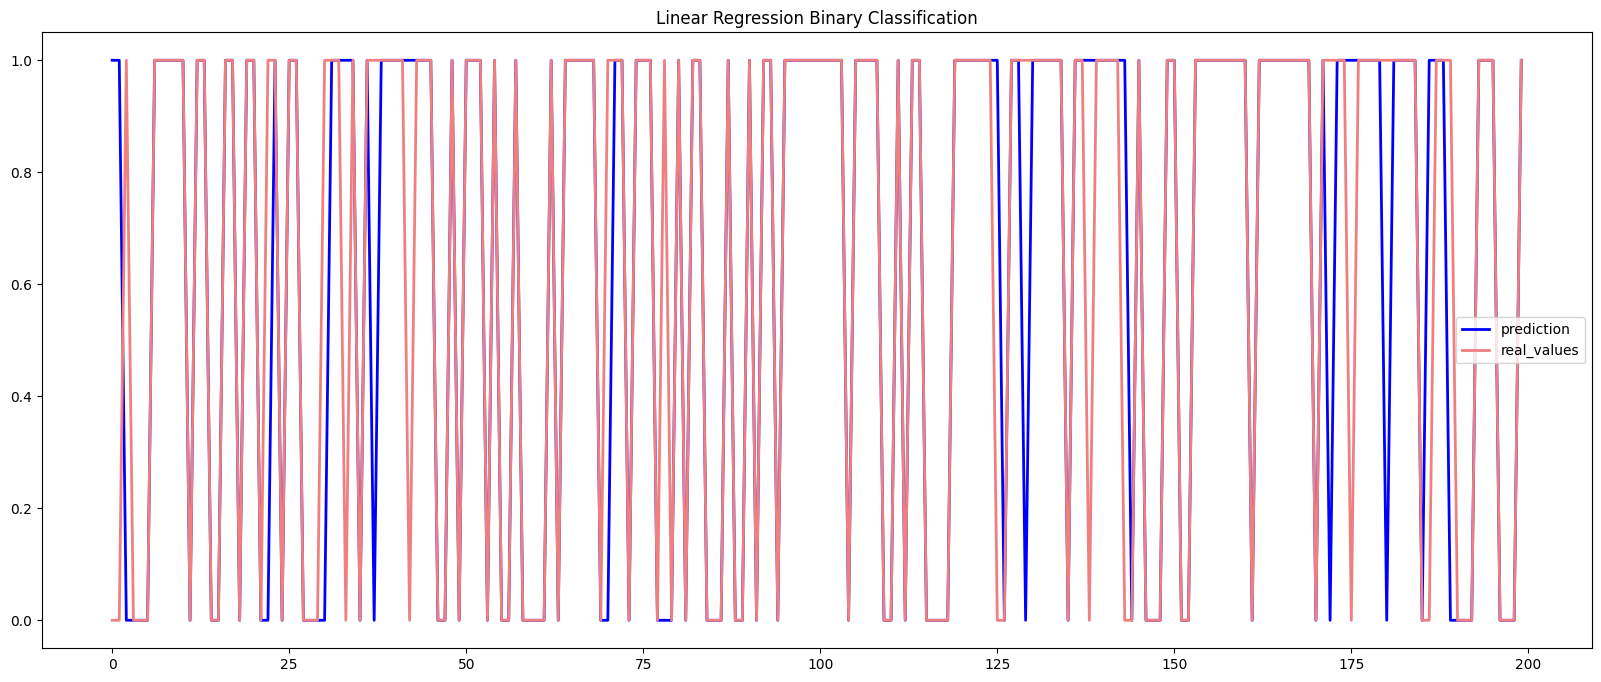

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/lr_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/linear_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_bin, file)
  print("Saved model to disk")
else:
  print("Previous Model exists on the disk! Please Remove")

Previous Model exists on the disk! Please Remove


## **Logistic Regression**

In [ ]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [ ]:
logr_bin.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=123)

In [ ]:
y_pred = logr_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.051555281798583305
Mean Squared Error -  0.051555281798583305
Root Mean Squared Error -  0.22705788204460842
R2 Score -  72.14793704265136
Accuracy -  94.84447182014168


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

NameError: ignored

### **Real and Predicted Data**

In [ ]:
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/logr_real_pred_bin.csv')
logr_bin_df

### **Plot between Real and Predicted Data**

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/logr_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/logistic_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

## **Linear Support Vector Machine**

In [ ]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

In [ ]:
y_pred = lsvm_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

NameError: ignored

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



### **Real and Predicted Data**

In [ ]:
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/lsvm_real_pred_bin.csv')
lsvm_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

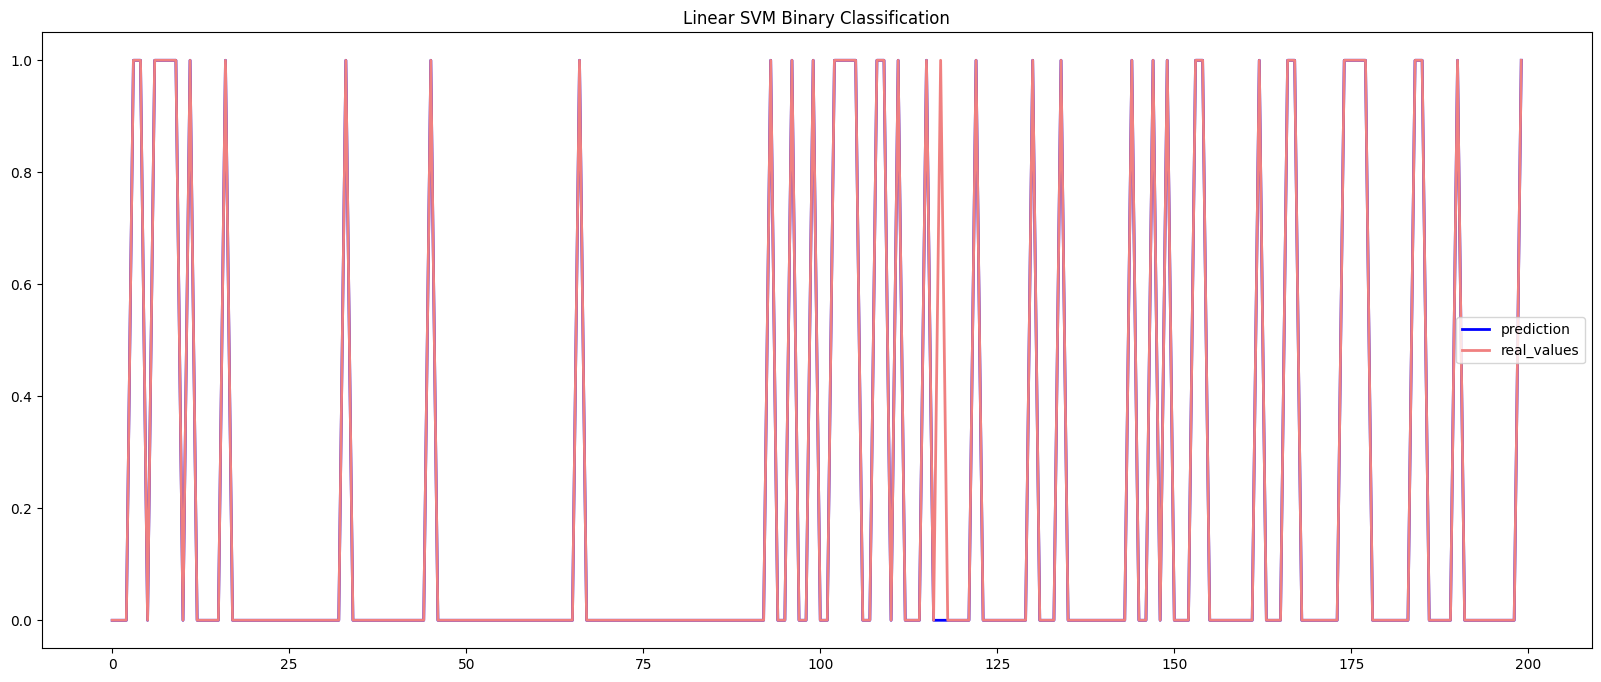

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/lsvm_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

NameError: ignored

## **K Nearest Neighbor Classifier**

In [ ]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.045765321835540496
Mean Squared Error -  0.045765321835540496
Root Mean Squared Error -  0.21392831003759297
R2 Score -  74.97697807665357
Accuracy -  95.42346781644595


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.81      0.69      0.75     11068
      normal       0.87      0.93      0.90     24001

    accuracy                           0.85     35069
   macro avg       0.84      0.81      0.82     35069
weighted avg       0.85      0.85      0.85     35069



### **Real and Predicted Data**

In [ ]:
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/knn_real_pred_bin.csv')
knn_bin_df

,Actual,Predicted
85117,0,1
82473,0,1
84417,1,1
7760,0,0
1517,0,1
...,...,...
77264,1,1
52317,1,1
41979,0,1
96464,1,1


### **Plot between Real and Predicted Data**

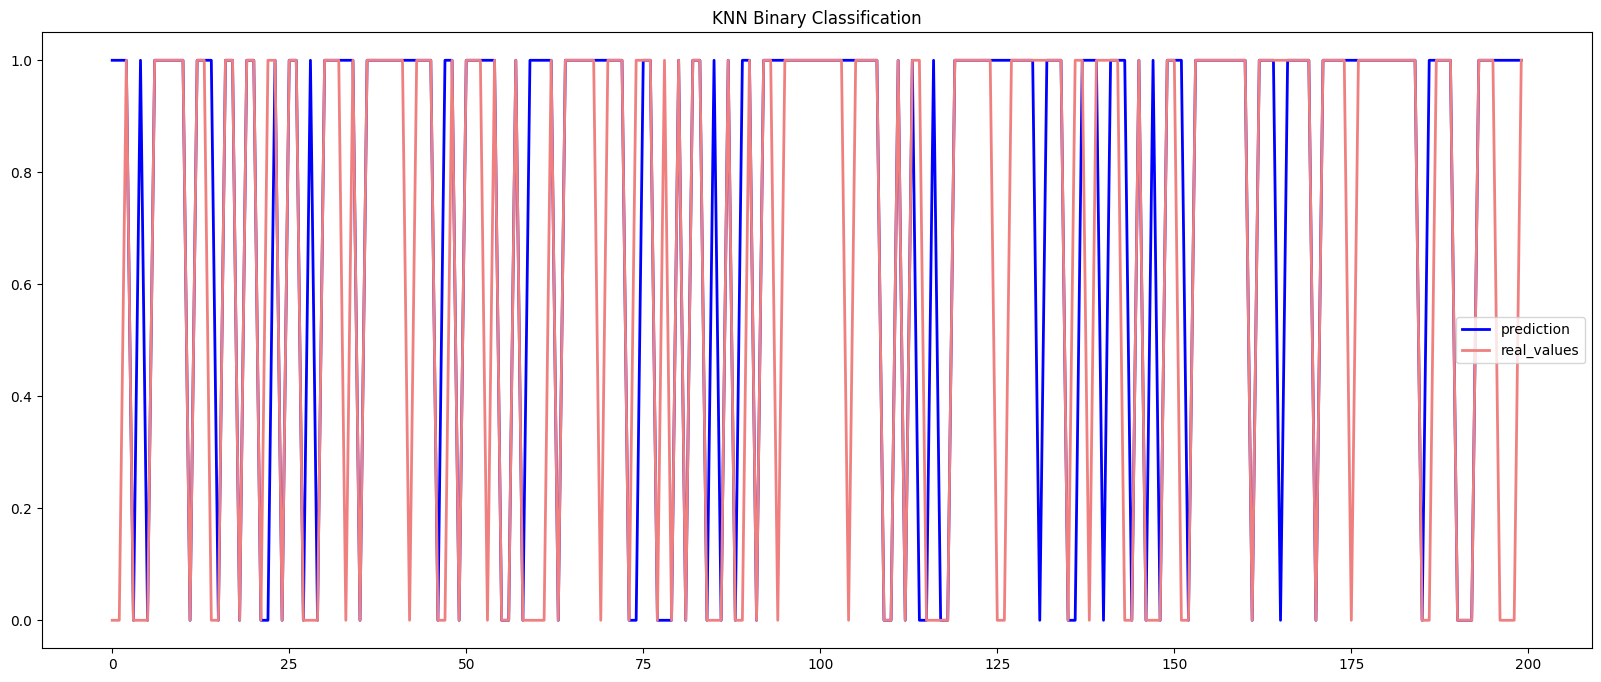

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/knn_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


### **Saving Trained Model to Disk**

## **Random Forest Classifier**

In [ ]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [ ]:
y_pred = rf_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.017000307976593777
Mean Squared Error -  0.017000307976593777
Root Mean Squared Error -  0.1303852291350281
R2 Score -  90.71156660862465
Accuracy -  98.29996920234062


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     11068
      normal       0.99      1.00      0.99     24001

    accuracy                           0.99     35069
   macro avg       0.99      0.99      0.99     35069
weighted avg       0.99      0.99      0.99     35069



### **Real and Predicted Data**

In [ ]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
85117,0,0
82473,0,1
84417,1,1
7760,0,0
1517,0,0
...,...,...
77264,1,1
52317,1,1
41979,0,0
96464,1,1


### **Plot between Real and Predicted Data**

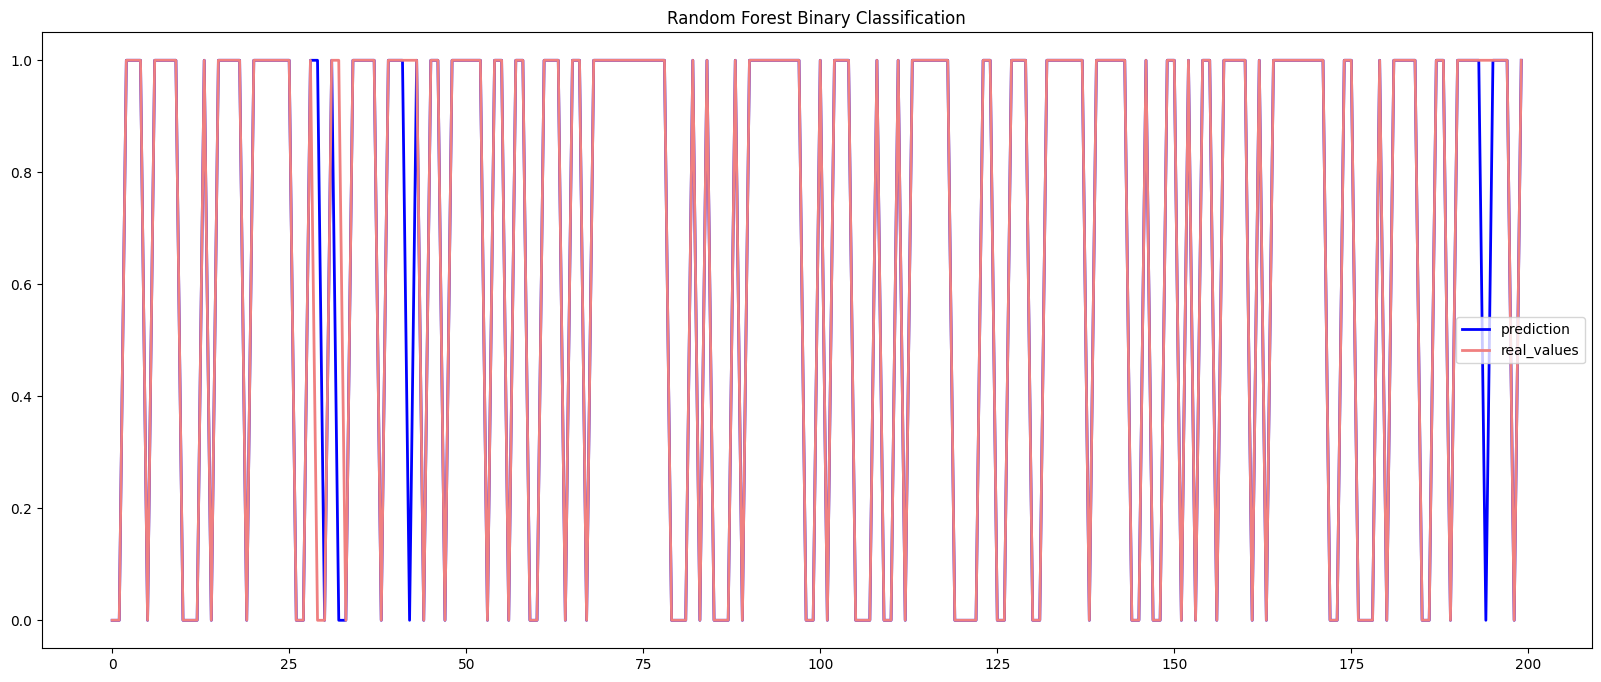

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/rf_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Decision Tree Classifier**

In [ ]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.021004003695719125
Mean Squared Error -  0.021004003695719125
Root Mean Squared Error -  0.14492758086616614
R2 Score -  88.51177695127845
Accuracy -  97.89959963042809


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98     11068
      normal       0.99      0.99      0.99     24001

    accuracy                           0.99     35069
   macro avg       0.99      0.99      0.99     35069
weighted avg       0.99      0.99      0.99     35069



### **Real and Predicted Data**

In [ ]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
85117,0,0
82473,0,1
84417,1,1
7760,0,0
1517,0,0
...,...,...
77264,1,0
52317,1,1
41979,0,0
96464,1,1


### **Plot between Real and Predicted Data**

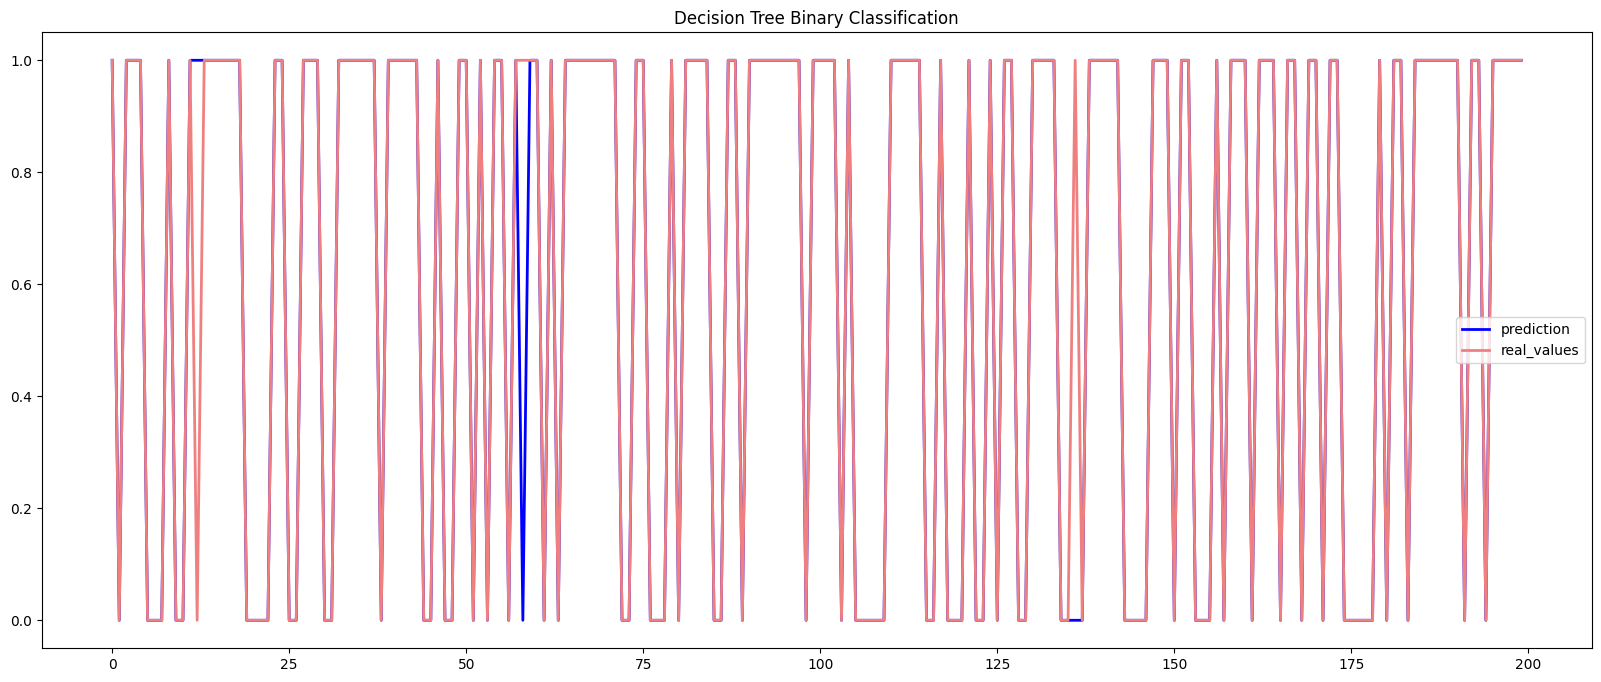

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/dt_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Multi Layer Perceptron**

In [ ]:
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [ ]:
mlp_bin.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [ ]:
y_pred = mlp_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06559901447489991
Mean Squared Error -  0.06559901447489991
Root Mean Squared Error -  0.2561230455755591
R2 Score -  64.11515888790278
Accuracy -  93.44009855251001


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

NameError: ignored

### **Real and Predicted Data**

In [ ]:
mlp_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_bin_df.to_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/predictions/mlp_real_pred_bin.csv')
mlp_bin_df

,Actual,Predicted
85117,0,1
82473,0,1
84417,1,1
7760,0,0
1517,0,0
...,...,...
77264,1,1
52317,1,1
41979,0,1
96464,1,1


### **Plot between Real and Predicted Data**

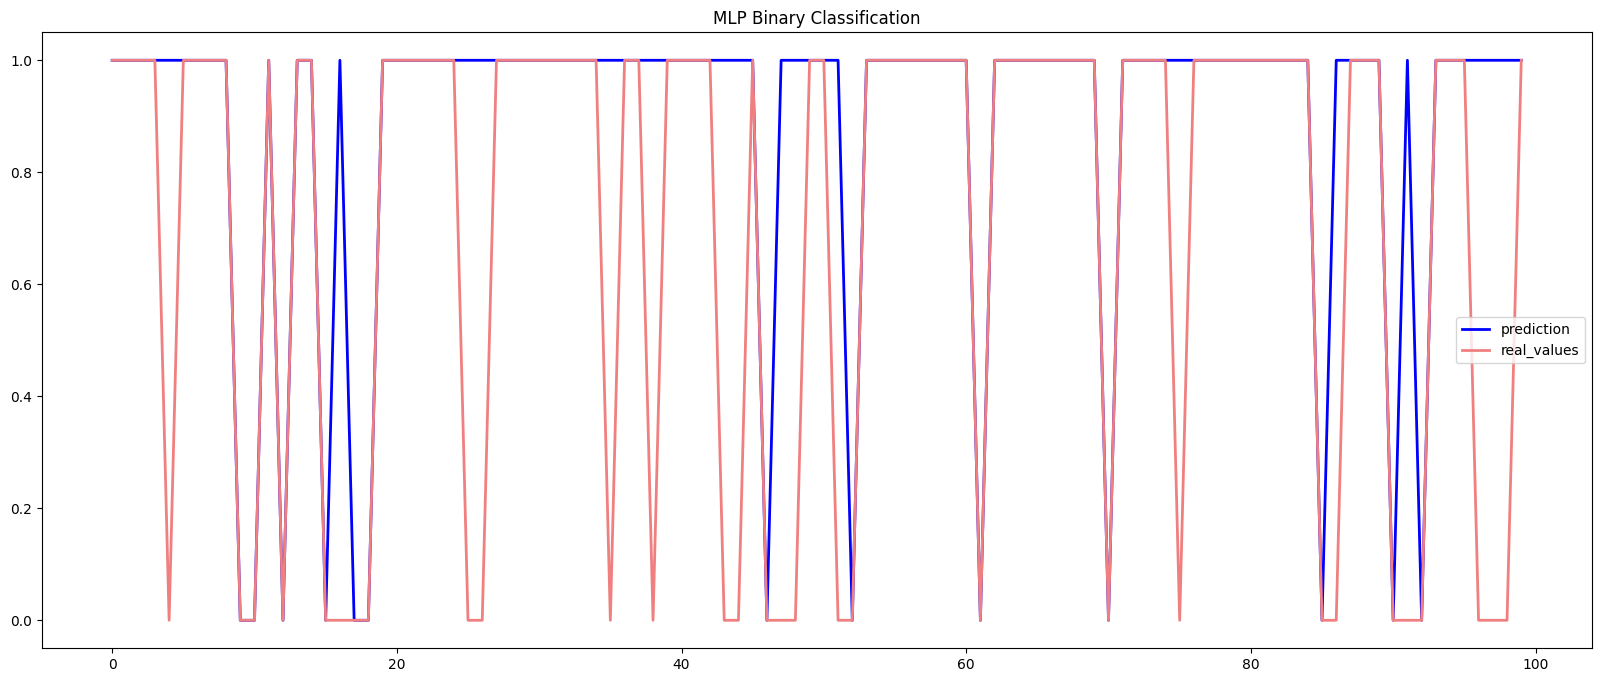

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Binary Classification")
plt.savefig('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/plots/mlp_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [ ]:
pkl_filename = "/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/models/mlp_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the UNSW-NB15 dataset (replace 'your_dataset.csv' with the actual file path)
dataset=pd.read_csv('/content/drive/MyDrive/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master-20230925T050702Z-001/datasets/bin_data_gwo_cuckoo_50_initial.csv')

# Separate features (X) and labels (y)
X = dataset.drop('label', axis=1)
y = dataset['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define the base models
base_models = [
    ('svc', SVC()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)


from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Assuming y_pred and y_test are your predicted and true labels, respectively
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
precision = precision_score(y_test, y_pred)

print(f'Precision: {precision}')
# print("F1 Score: ", f1_score(y_test, y_pred))



accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy}')

F1 Score: 0.997882765712903
Precision: 0.9967371601208459
Stacking Classifier Accuracy: 0.9967662457653218
